<a href="https://colab.research.google.com/github/srikanth6964/AI-ML-DA-Templates/blob/main/House_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

READ THE DATASET

In [ ]:
dt=pd.read_csv('/content/drive/MyDrive/ dataset/real estate valuation data set.csv')

In [ ]:
dt.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
dt

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CHECKING NULL VALUES

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
dt.dropna(inplace=True)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
dt.isnull().any()

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

In [ ]:
x=dt.drop('Y house price of unit area',axis=1)
y=dt['Y house price of unit area']

UNIVARIATE

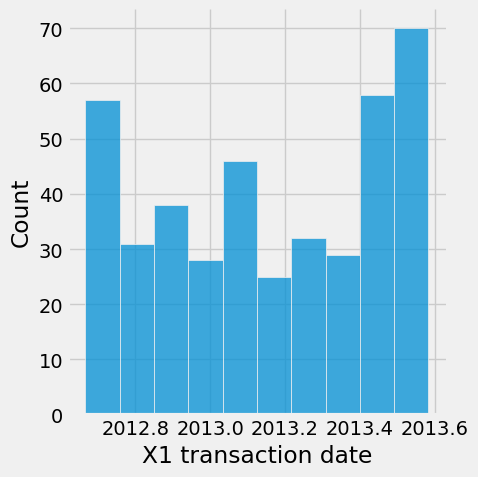

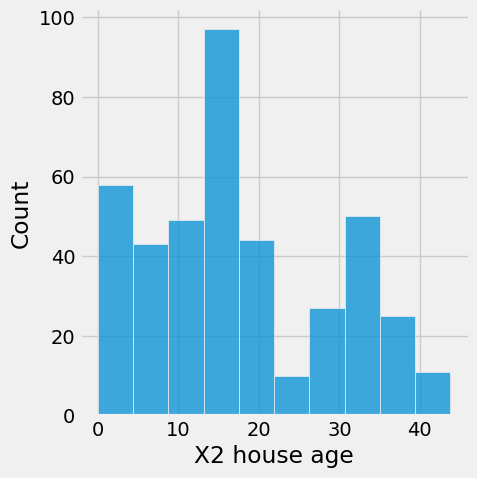

In [ ]:
sns.displot(dt['X1 transaction date'])
sns.displot(dt['X2 house age'])

TRAIN THE DATA

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
train_dt=x_train.join(y_train)

In [ ]:
train_dt

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
192,193,2013.167,43.8,57.58945,7,24.96750,121.54069,42.7
234,235,2013.250,8.0,2216.61200,4,24.96007,121.51361,23.9
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
45,46,2013.083,36.6,488.81930,8,24.97015,121.54494,38.3
245,246,2013.417,7.5,639.61980,5,24.97258,121.54814,40.8
...,...,...,...,...,...,...,...,...
71,72,2013.083,35.5,640.73910,3,24.97563,121.53715,40.8
106,107,2013.083,17.2,189.51810,8,24.97707,121.54308,47.1
270,271,2013.333,10.8,252.58220,1,24.97460,121.53046,117.5
348,349,2012.833,4.6,259.66070,6,24.97585,121.54516,53.7


BIVARIATE

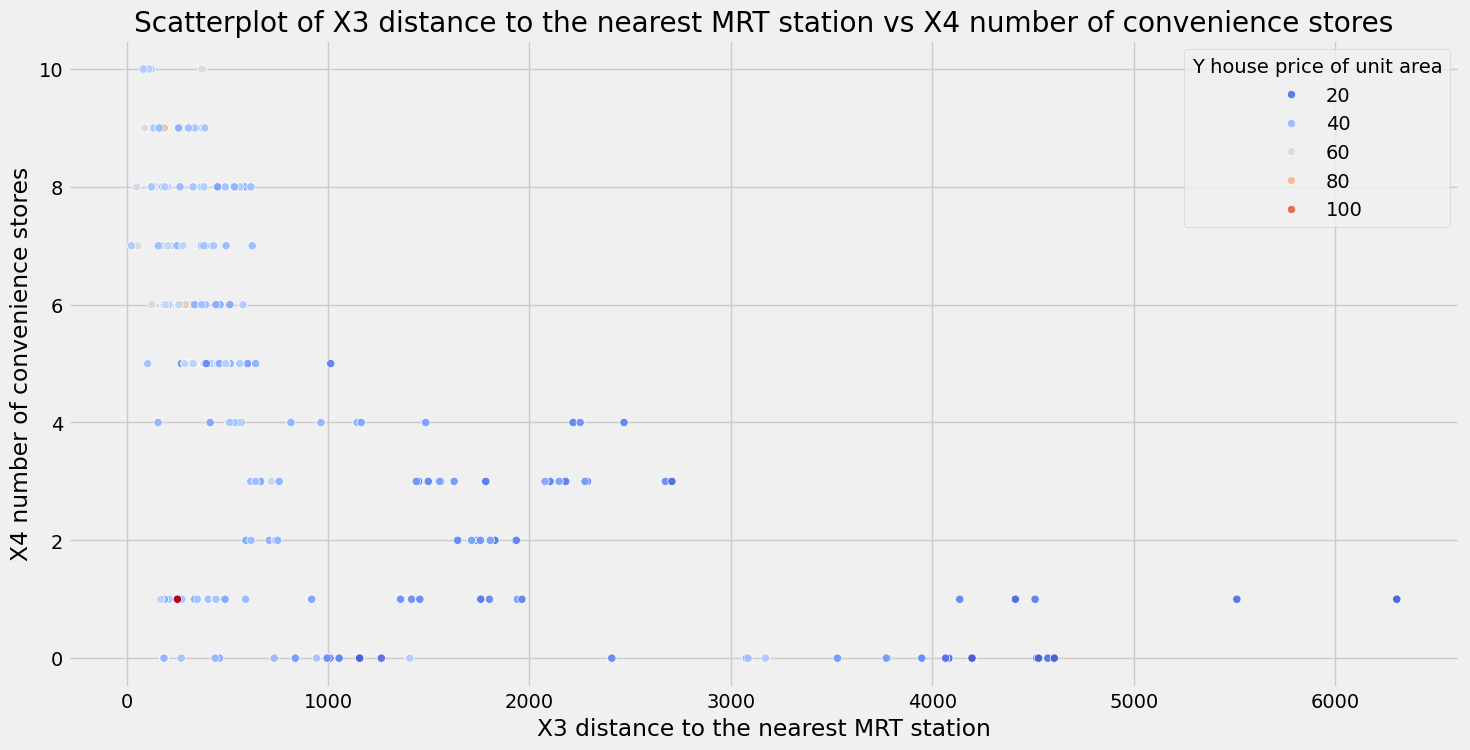

In [ ]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='X3 distance to the nearest MRT station',
y='X4 number of convenience stores',
              data=train_dt,
                hue='Y house price of unit area',palette="coolwarm")
plt.title('Scatterplot of X3 distance to the nearest MRT station vs X4 number of convenience stores')
plt.show()


MULTIVARIATE

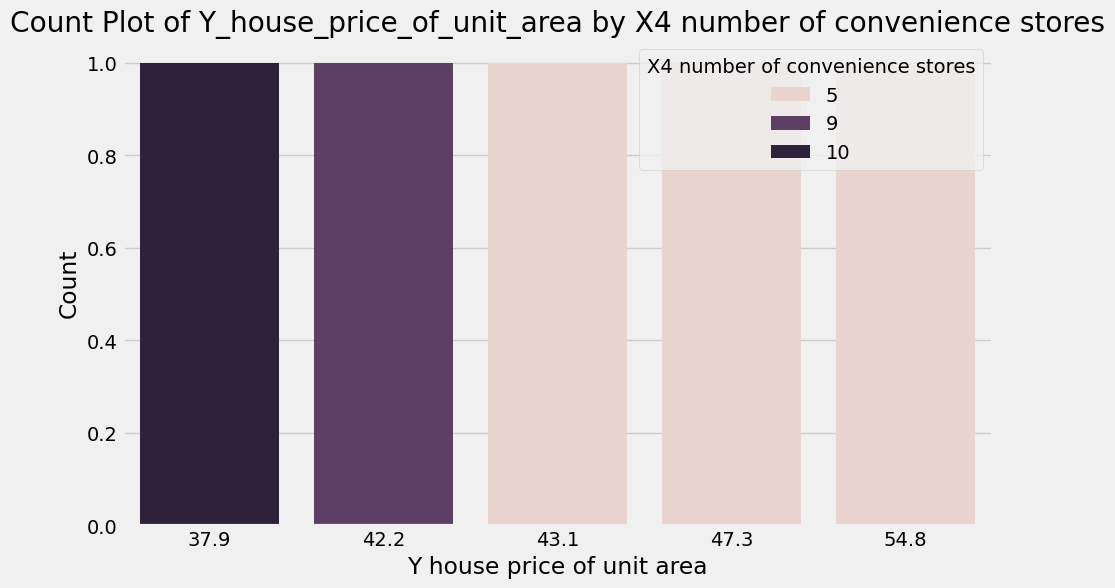

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    "X1 transaction date": [2012.917, 2012.917, 2013.583, 2013.500, 2012.833],
    "X2 house age": [32.0, 19.5, 13.3, 13.3, 5.0],
    "X3 distance to the nearest MRT station": [84.87882, 306.59470, 561.98450, 561.98450, 390.56840],
    "X4 number of convenience stores": [10, 9, 5, 5, 5],
    "X5 latitude": [24.98298, 24.98034, 24.98746, 24.98746, 24.97937],
    "X6 longitude": [121.54024, 121.53951, 121.54391, 121.54391, 121.54245],
    "Y_house_price_of_unit_area": [37.9, 42.2, 47.3, 54.8, 43.1]
}
dt = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.countplot(x='Y_house_price_of_unit_area', hue='X4 number of convenience stores', data=dt)
plt.title('Count Plot of Y_house_price_of_unit_area by X4 number of convenience stores')
plt.xlabel('Y house price of unit area')
plt.ylabel('Count')
plt.legend(title='X4 number of convenience stores')
plt.show()


In [ ]:
dt.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y_house_price_of_unit_area
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000
mean,2013.150000,16.620000,381.202184,6.80000,24.983522,121.542004,45.06000
std,0.360228,10.023822,199.264918,2.48998,0.003830,0.002049,6.38694
min,2012.833000,5.000000,84.878820,5.00000,24.979370,121.539510,37.90000
25%,2012.917000,13.300000,306.594700,5.00000,24.980340,121.540240,42.20000
50%,2012.917000,13.300000,390.568400,5.00000,24.982980,121.542450,43.10000
75%,2013.500000,19.500000,561.984500,9.00000,24.987460,121.543910,47.30000
max,2013.583000,32.000000,561.984500,10.00000,24.987460,121.543910,54.80000


In [ ]:
dt.isnull().any()

X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y_house_price_of_unit_area                False
dtype: bool

OUTLIERS

outliers in the column 'X1_transaction_date':
All Outliers:
   X1_transaction_date  X2_house_age  X3_distance_to_the_nearest_MRT_station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4_number_of_convenience_stores  X5_latitude  X6_longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y_house_price_of_unit_area       Outlier_Column  
0              

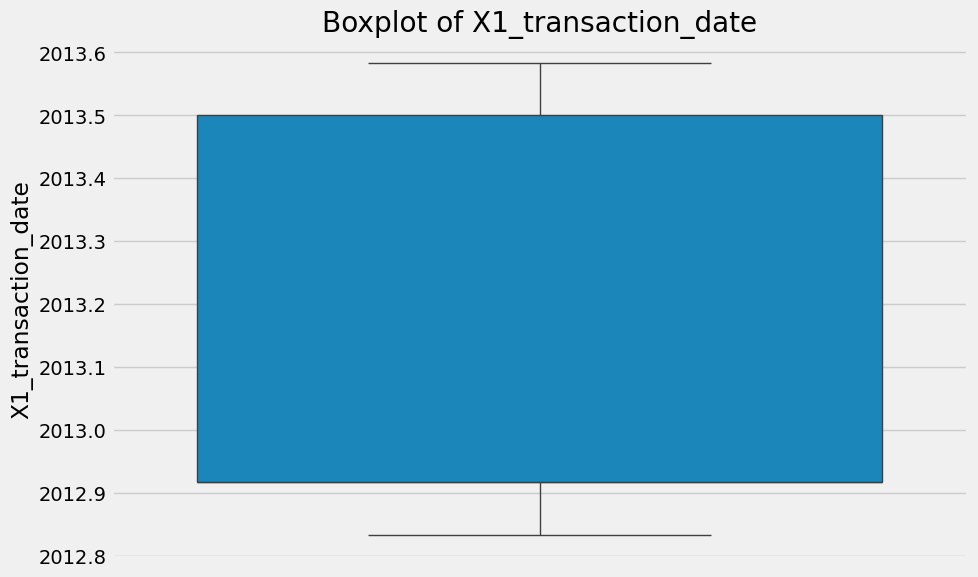

outliers in the column 'X2_house_age':
All Outliers:
   X1_transaction_date  X2_house_age  X3_distance_to_the_nearest_MRT_station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4_number_of_convenience_stores  X5_latitude  X6_longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y_house_price_of_unit_area       Outlier_Column  
0                     

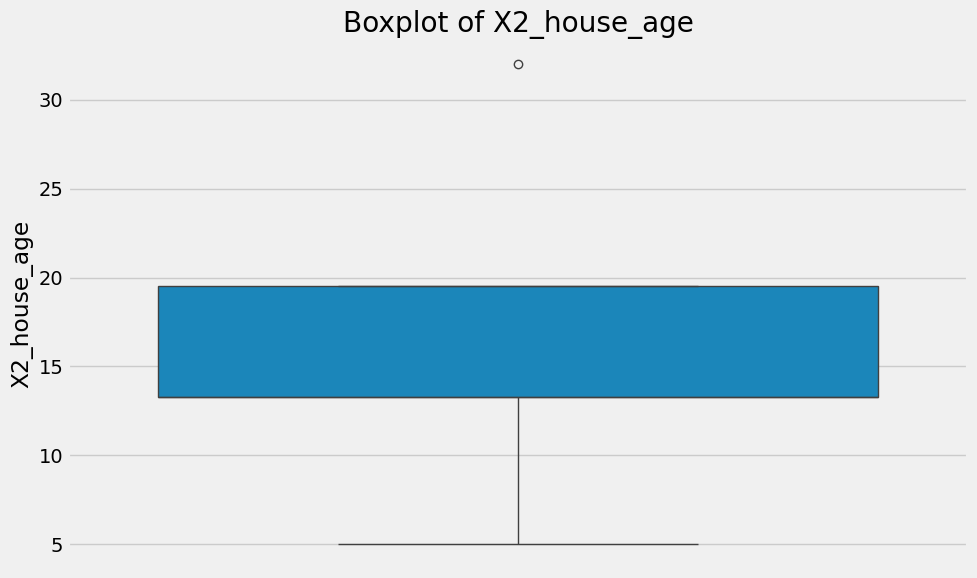

outliers in the column 'X3_distance_to_the_nearest_MRT_station':
All Outliers:
   X1_transaction_date  X2_house_age  X3_distance_to_the_nearest_MRT_station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4_number_of_convenience_stores  X5_latitude  X6_longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y_house_price_of_unit_area       Outlier_Colum

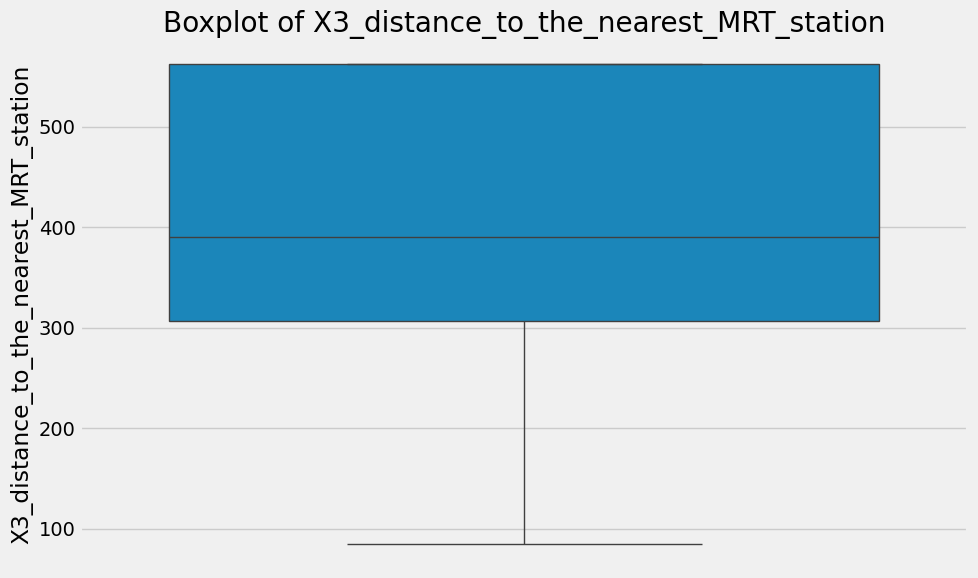

outliers in the column 'X4_number_of_convenience_stores':
All Outliers:
   X1_transaction_date  X2_house_age  X3_distance_to_the_nearest_MRT_station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4_number_of_convenience_stores  X5_latitude  X6_longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y_house_price_of_unit_area       Outlier_Column  
0  

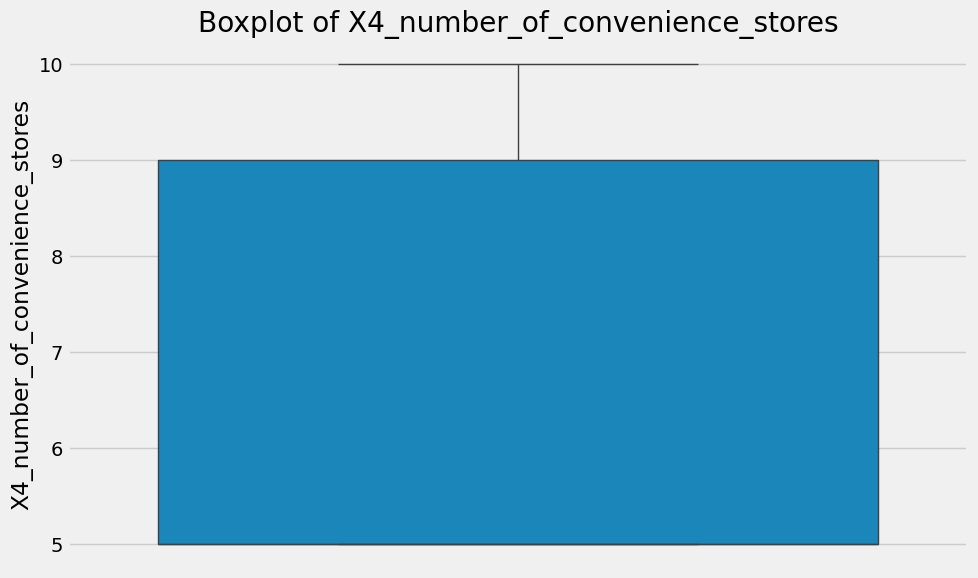

outliers in the column 'X5_latitude':
All Outliers:
   X1_transaction_date  X2_house_age  X3_distance_to_the_nearest_MRT_station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4_number_of_convenience_stores  X5_latitude  X6_longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y_house_price_of_unit_area       Outlier_Column  
0                      

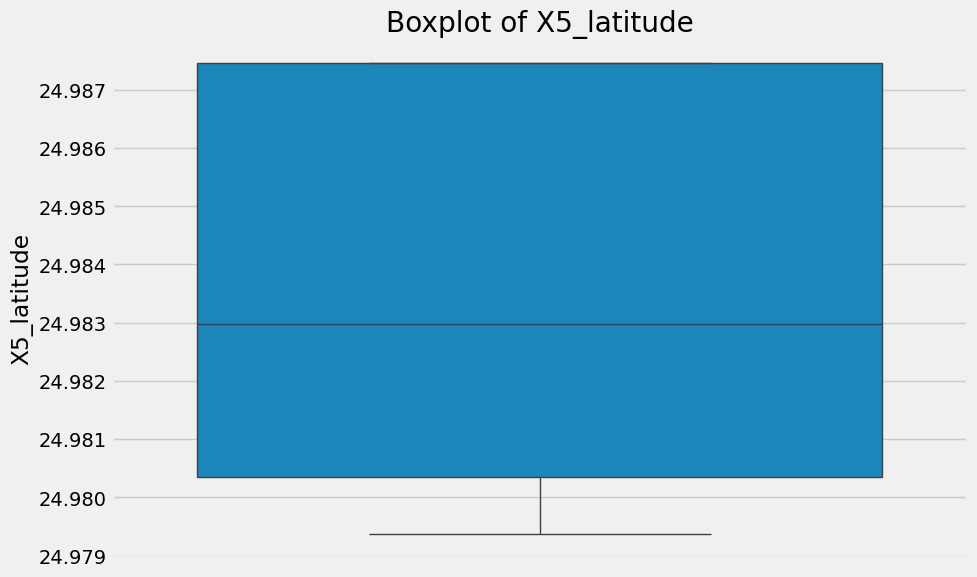

outliers in the column 'X6_longitude':
All Outliers:
   X1_transaction_date  X2_house_age  X3_distance_to_the_nearest_MRT_station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4_number_of_convenience_stores  X5_latitude  X6_longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y_house_price_of_unit_area       Outlier_Column  
0                     

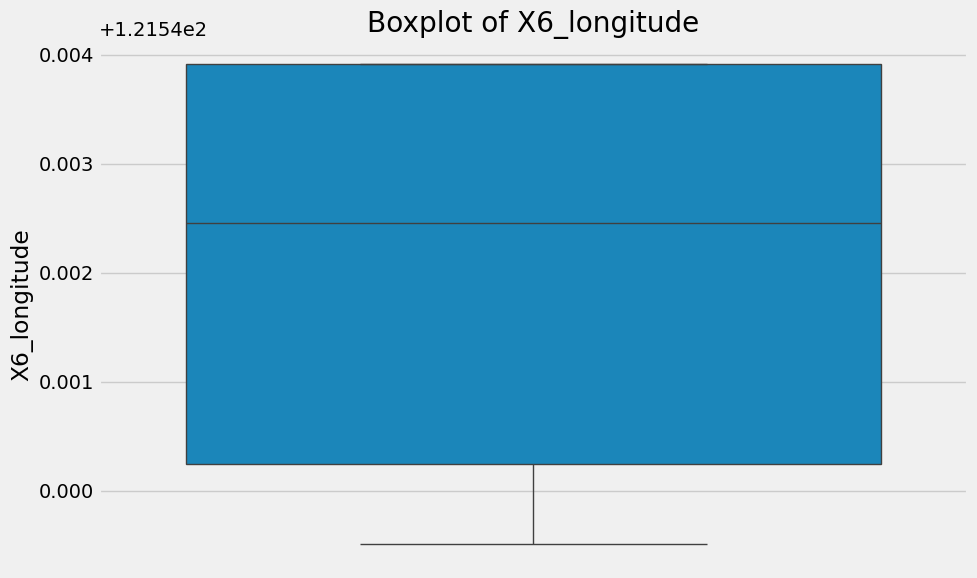

outliers in the column 'Y_house_price_of_unit_area':
All Outliers:
   X1_transaction_date  X2_house_age  X3_distance_to_the_nearest_MRT_station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4_number_of_convenience_stores  X5_latitude  X6_longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y_house_price_of_unit_area       Outlier_Column  
0       

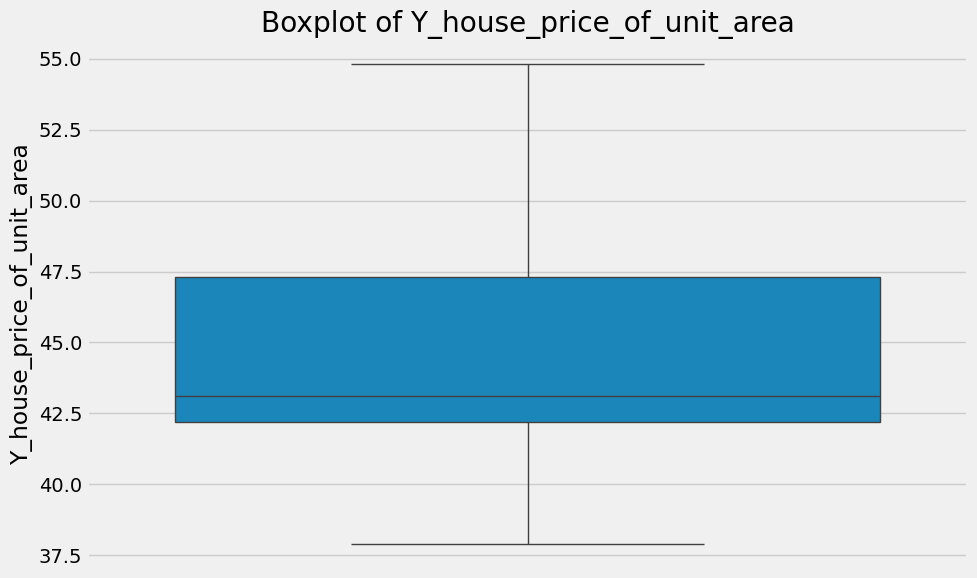

In [ ]:
dt.columns = dt.columns.str.replace(' ', '_')
column_to_check=['X1_transaction_date','X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores','X5_latitude','X6_longitude','Y_house_price_of_unit_area']
outliers_dt=pd.DataFrame()
for column_name in column_to_check:
  Q1=dt['X3_distance_to_the_nearest_MRT_station'].quantile(0.05)
  Q3=dt['X3_distance_to_the_nearest_MRT_station'].quantile(0.95)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  column_outliers=dt[(dt[column_name]<lower_limit)|(dt[column_name]>upper_limit)] # Now this line should work without error.
  column_outliers['Outlier_Column']=column_name
  outliers_dt=pd.concat([outliers_dt,column_outliers])
  outliers_dt.reset_index(drop=True,inplace=True)
  print("outliers in the column '{}':".format(column_name))
  print("All Outliers:")
  print(outliers_dt)
  plt.figure(figsize=(10,6))
  sns.boxplot(dt[column_name])
  plt.title('Boxplot of {}'.format(column_name))
  plt.tight_layout()
  plt.show()

HANDLING OUTLIERS

In [ ]:
data = {
    "X1 transaction date": [2012.917, 2012.917, 2013.583, 2013.500, 2012.833],
    "X2 house age": [32.0, 19.5, 13.3, 13.3, 5.0],
    "X3 distance to the nearest MRT station": [84.87882, 306.59470, 561.98450, 561.98450, 390.56840],
    "X4 number of convenience stores": [10, 9, 5, 5, 5],
    "X5 latitude": [24.98298, 24.98034, 24.98746, 24.98746, 24.97937],
    "X6 longitude": [121.54024, 121.53951, 121.54391, 121.54391, 121.54245],
    "Y house price of unit area": [37.9, 42.2, 47.3, 54.8, 43.1]
}
dt = pd.DataFrame(data)

# Define a function to remove outliers based on IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers
dt_no_outliers = remove_outliers_iqr(dt)

print("Original dataset size:", dt.shape)
print("Dataset size after removing outliers:", dt_no_outliers.shape)
print("Number of rows removed:", dt.shape[0] - dt_no_outliers.shape[0])

Original dataset size: (5, 7)
Dataset size after removing outliers: (4, 7)
Number of rows removed: 1


<Axes: xlabel='X3 distance to the nearest MRT station'>

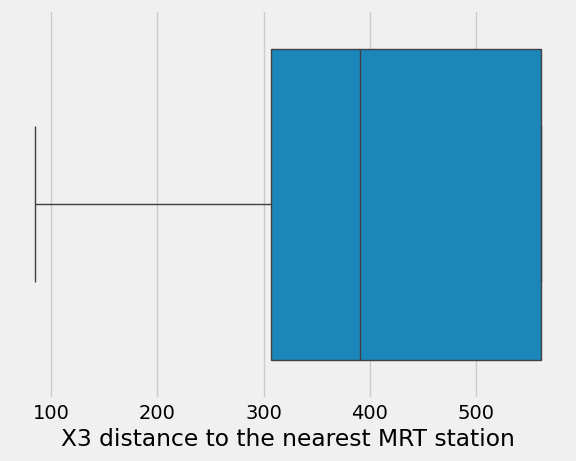

In [ ]:
sns.boxplot(data=dt,x='X3 distance to the nearest MRT station')

<Axes: xlabel='X4 number of convenience stores'>

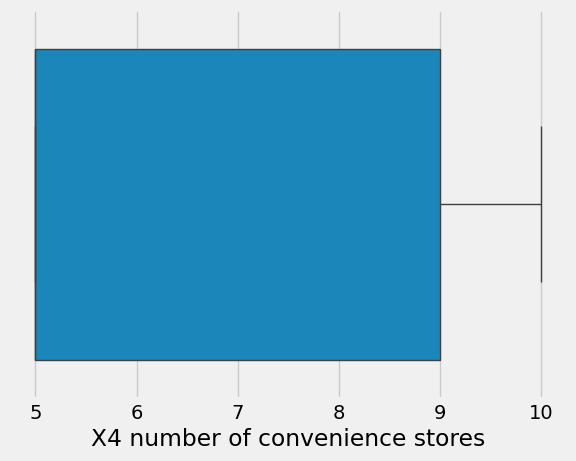

In [ ]:
sns.boxplot(data=dt,x='X4 number of convenience stores')

<Axes: xlabel='X5 latitude'>

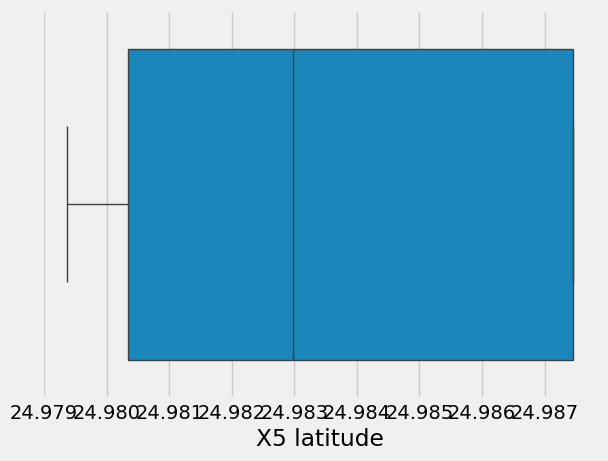

In [ ]:
sns.boxplot(data=dt,x='X5 latitude')

<Axes: xlabel='X6 longitude'>

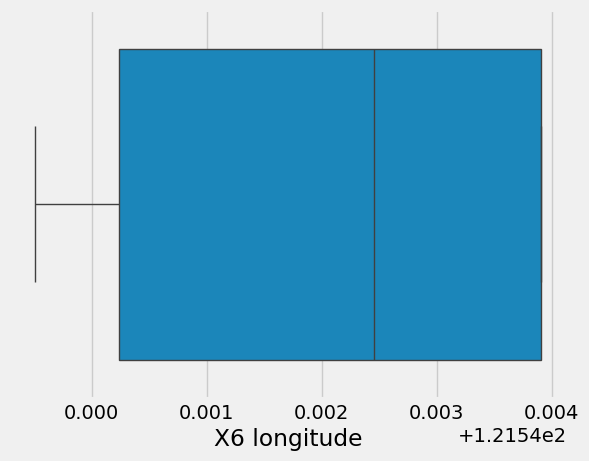

In [ ]:
sns.boxplot(data=dt,x='X6 longitude')

<Axes: xlabel='Y house price of unit area'>

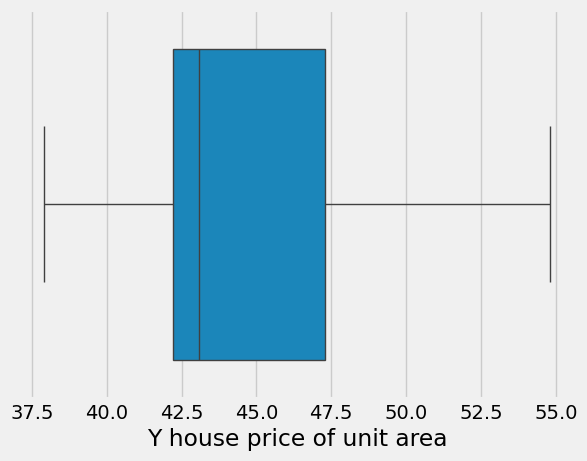

In [ ]:
sns.boxplot(data=dt,x='Y house price of unit area')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
train_dt=x_train.join(y_train)
train_dt

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
192,193,2013.167,43.8,57.58945,7,24.96750,121.54069,42.7
234,235,2013.250,8.0,2216.61200,4,24.96007,121.51361,23.9
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
45,46,2013.083,36.6,488.81930,8,24.97015,121.54494,38.3
245,246,2013.417,7.5,639.61980,5,24.97258,121.54814,40.8
...,...,...,...,...,...,...,...,...
71,72,2013.083,35.5,640.73910,3,24.97563,121.53715,40.8
106,107,2013.083,17.2,189.51810,8,24.97707,121.54308,47.1
270,271,2013.333,10.8,252.58220,1,24.97460,121.53046,117.5
348,349,2012.833,4.6,259.66070,6,24.97585,121.54516,53.7


In [ ]:
X=dt.drop('Y house price of unit area',axis=1)
Y=dt['Y house price of unit area']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
train_dt=x_train.join(y_train)
train_dt

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
192,193,2013.167,43.8,57.58945,7,24.96750,121.54069,42.7
234,235,2013.250,8.0,2216.61200,4,24.96007,121.51361,23.9
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
45,46,2013.083,36.6,488.81930,8,24.97015,121.54494,38.3
245,246,2013.417,7.5,639.61980,5,24.97258,121.54814,40.8
...,...,...,...,...,...,...,...,...
71,72,2013.083,35.5,640.73910,3,24.97563,121.53715,40.8
106,107,2013.083,17.2,189.51810,8,24.97707,121.54308,47.1
270,271,2013.333,10.8,252.58220,1,24.97460,121.53046,117.5
348,349,2012.833,4.6,259.66070,6,24.97585,121.54516,53.7


HISTOGRAM

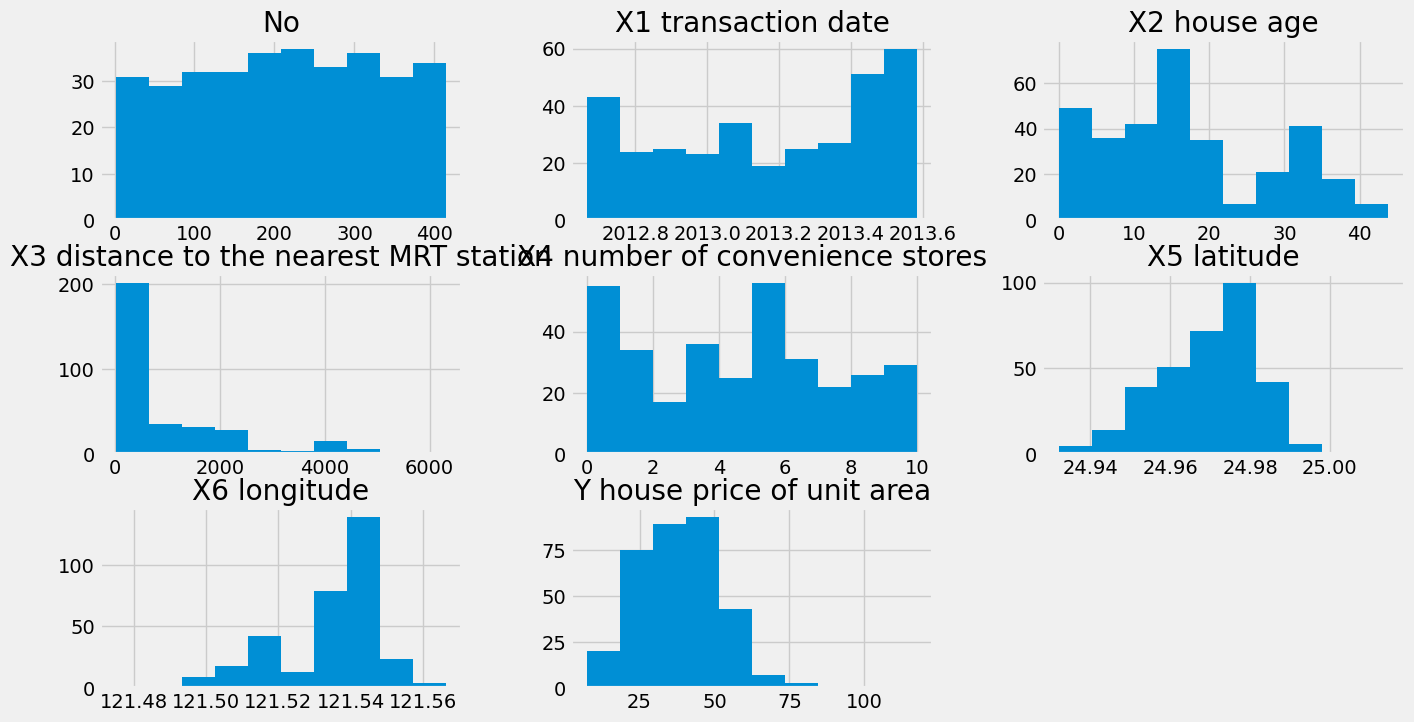

In [ ]:
train_dt.hist(figsize=(15,8))
plt.show()

HEATMAP

<Axes: >

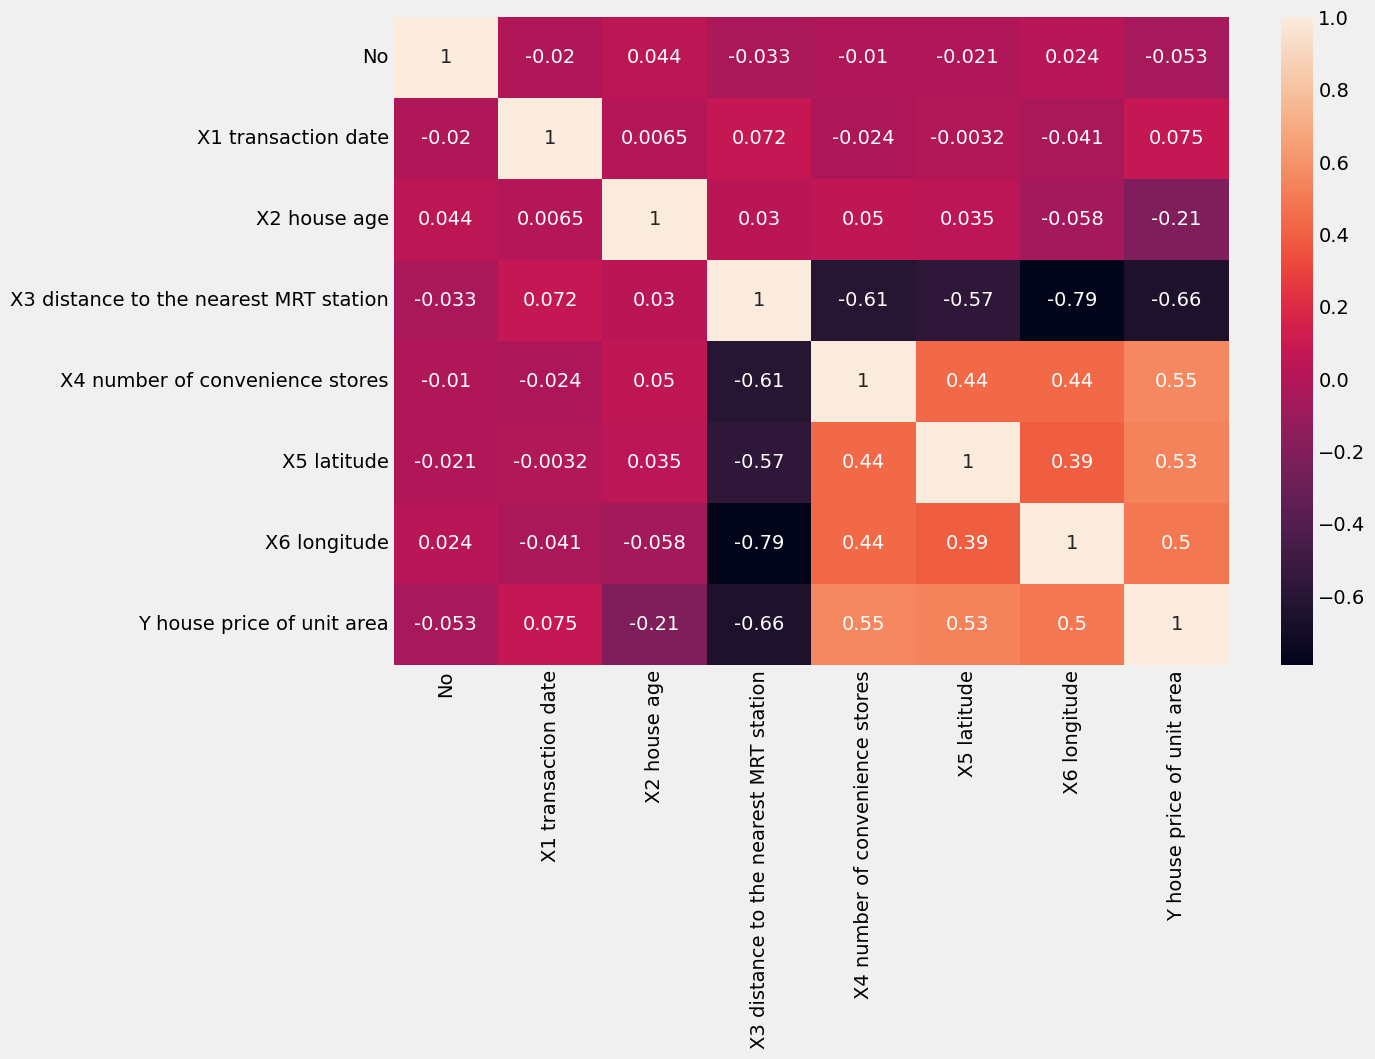

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train_dt.corr(),annot=True)

In [ ]:
train_dt['X1 transaction date'] = np.log(train_dt['X1 transaction date'])
train_dt['X2 house age'] = np.log(train_dt['X2 house age'])
train_dt['X3 distance to the nearest MRT station'] = np.log(train_dt['X3 distance to the nearest MRT station'])
train_dt['X4 number of convenience stores'] = np.log(train_dt['X4 number of convenience stores'])

In [ ]:
train_dt

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
192,193,7.607464,3.779634,4.053339,1.945910,24.96750,121.54069,42.7
234,235,7.607506,2.079442,7.703735,1.386294,24.96007,121.51361,23.9
5,6,7.607216,1.960095,7.684798,1.098612,24.96305,121.51254,32.1
45,46,7.607423,3.600048,6.191993,2.079442,24.97015,121.54494,38.3
245,246,7.607589,2.014903,6.460874,1.609438,24.97258,121.54814,40.8
...,...,...,...,...,...,...,...,...
71,72,7.607423,3.569533,6.462622,1.098612,24.97563,121.53715,40.8
106,107,7.607423,2.844909,5.244485,2.079442,24.97707,121.54308,47.1
270,271,7.607547,2.379546,5.531737,0.000000,24.97460,121.53046,117.5
348,349,7.607298,1.526056,5.559376,1.791759,24.97585,121.54516,53.7


In [ ]:
train_dt=pd.DataFrame(data)

In [ ]:
train_dt.isna().any()

X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

In [ ]:
train_dt_cleaned=train_dt.dropna()

In [ ]:
train_dt_filled=train_dt.fillna(train_dt.mean())

array([[<Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>,
        <Axes: title={'center': 'X3 distance to the nearest MRT station'}>],
       [<Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>,
        <Axes: title={'center': 'X6 longitude'}>],
       [<Axes: title={'center': 'Y house price of unit area'}>, <Axes: >,
        <Axes: >]], dtype=object)

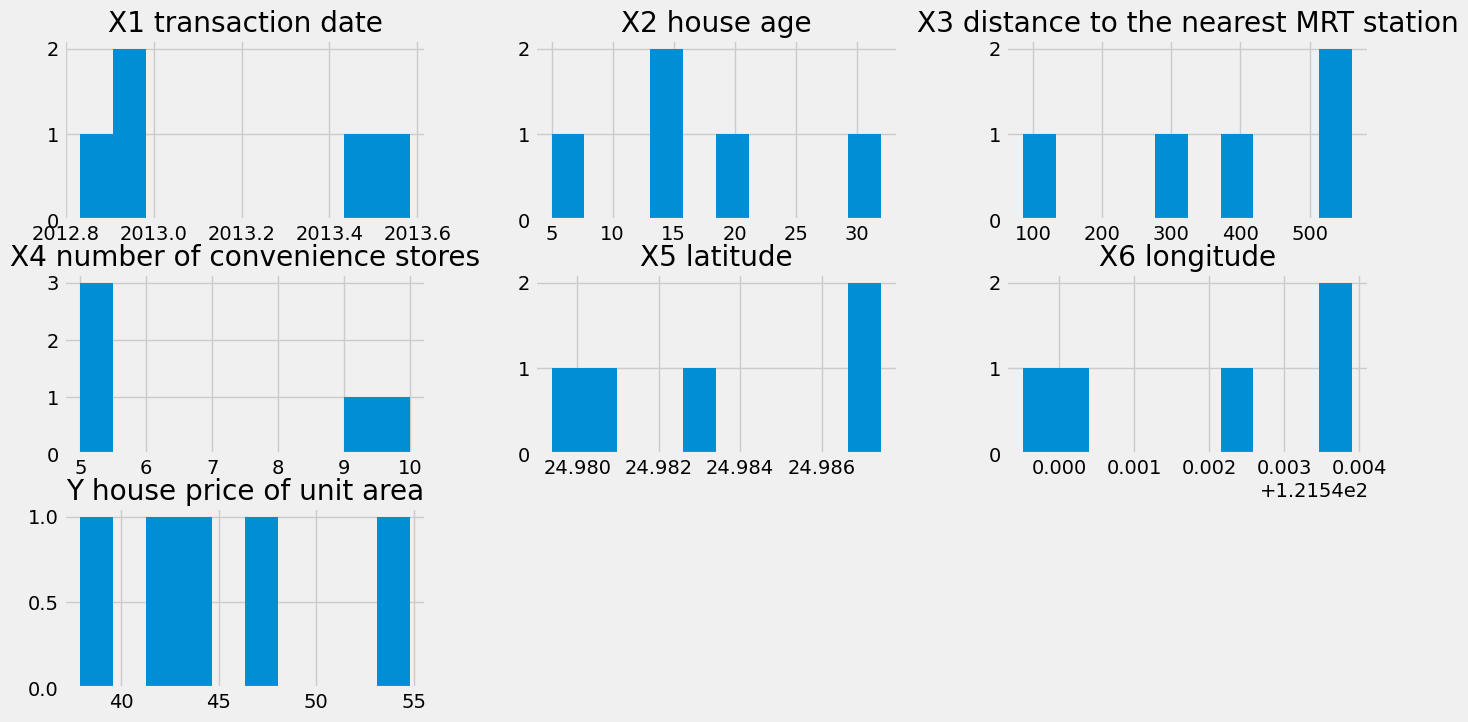

In [ ]:
train_dt_cleaned.hist(figsize=(15,8))

array([[<Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>,
        <Axes: title={'center': 'X3 distance to the nearest MRT station'}>],
       [<Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>,
        <Axes: title={'center': 'X6 longitude'}>],
       [<Axes: title={'center': 'Y house price of unit area'}>, <Axes: >,
        <Axes: >]], dtype=object)

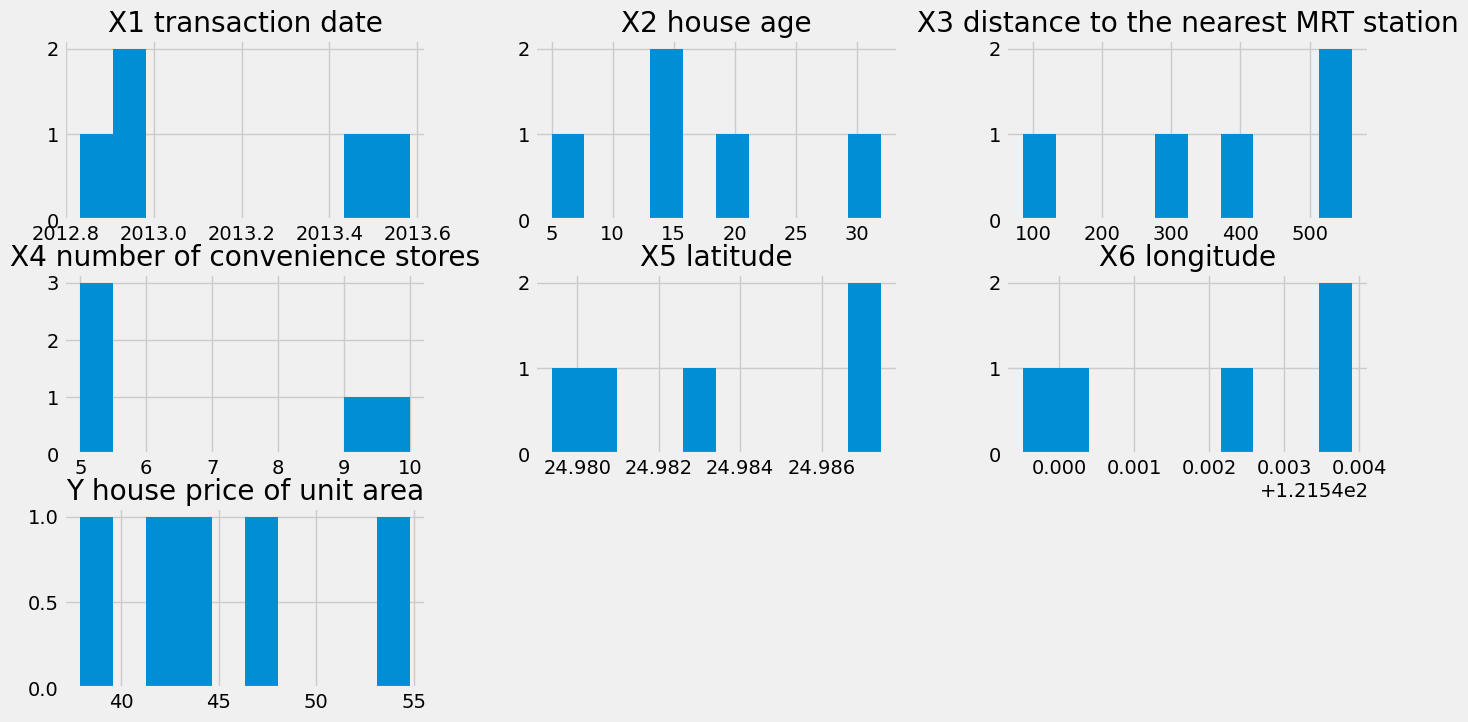

In [ ]:
train_dt_filled.hist(figsize=(15,8))

**HEAT MAP**

<Axes: >

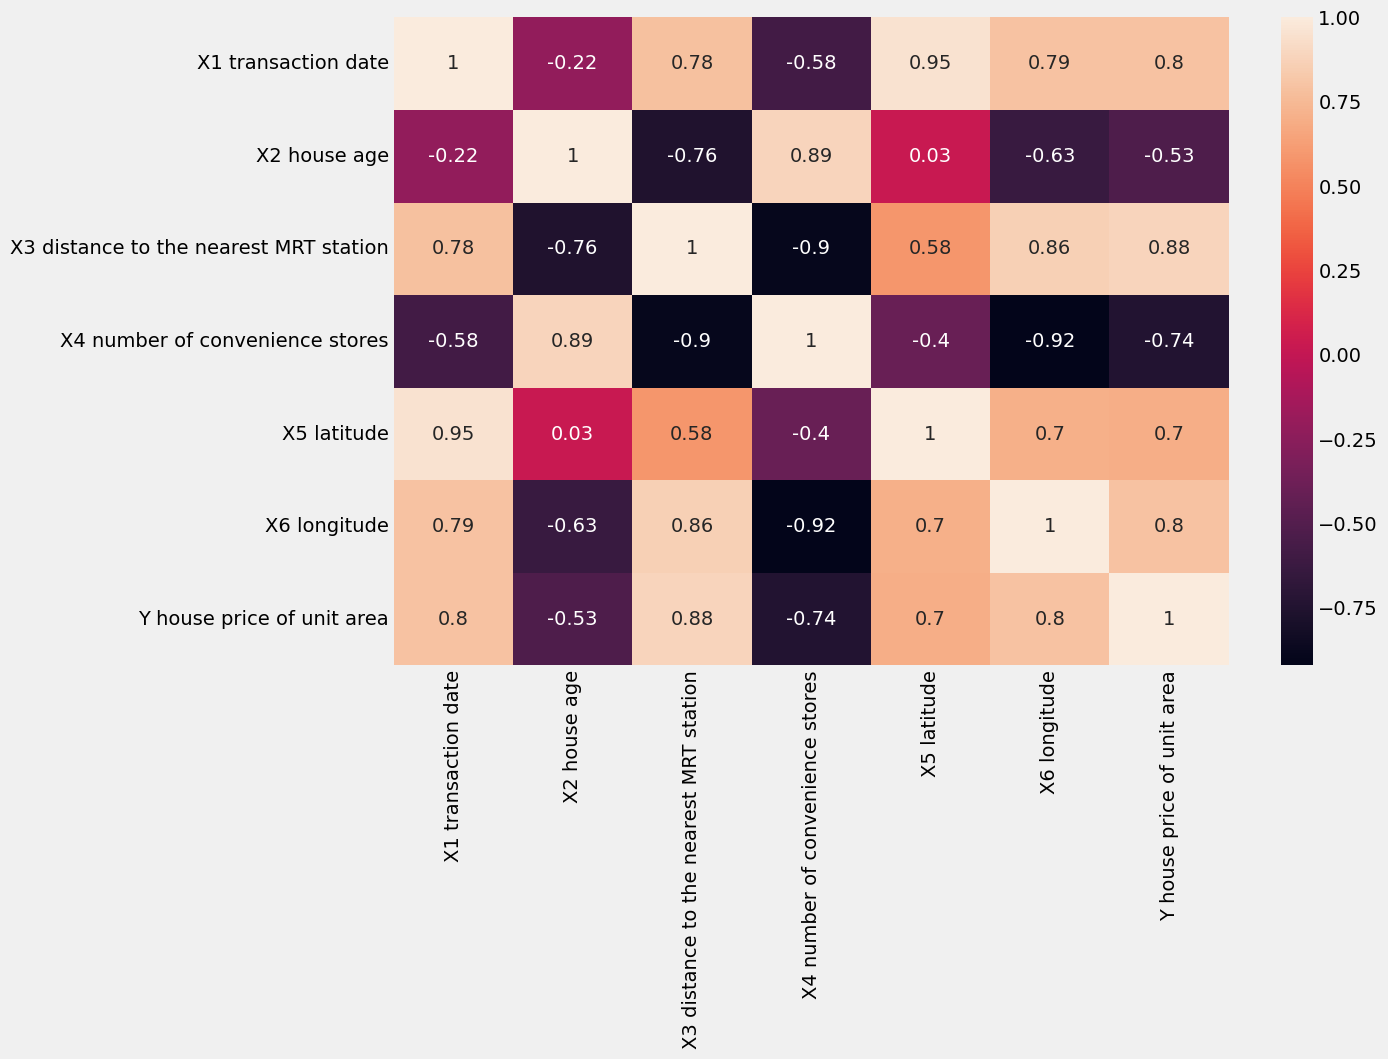

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train_dt.corr(),annot=True)

In [ ]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]

In [ ]:
dt.dropna(inplace=True)

FEATURE MATRIX

In [ ]:
X1_transaction_date=['2012.917','2012.917','2013.583','2013.500','2012.833']
X2_house_age=['32.0','19.5','13.3','13.3','5.0']
X3_distance_to_the_nearest_MRT_station=['84.87882','306.59470','561.98450','561.98450','390.56840']
X4_number_of_convenience_stores=['10','9','5','5','5']
X5_latitude=['24.98298','24.98034','24.98746','24.98746','24.97937']
X6_longitude=['121.54024','121.53951','121.54391','121.54391','121.54245']
dt = pd.DataFrame({
    'X1_transaction_date': X1_transaction_date,
    'X2_house_age': X2_house_age,
    'X3_distance_to_the_nearest_MRT_station': X3_distance_to_the_nearest_MRT_station,
    'X4_number_of_convenience_stores': X4_number_of_convenience_stores,
    'X5_latitude': X5_latitude,
    'X6_longitude': X6_longitude
})
numerical_features=dt[['X1_transaction_date','X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores','X5_latitude','X6_longitude']]
X=dt.values
print("feature matrix")
print(X)

feature matrix
[['2012.917' '32.0' '84.87882' '10' '24.98298' '121.54024']
 ['2012.917' '19.5' '306.59470' '9' '24.98034' '121.53951']
 ['2013.583' '13.3' '561.98450' '5' '24.98746' '121.54391']
 ['2013.500' '13.3' '561.98450' '5' '24.98746' '121.54391']
 ['2012.833' '5.0' '390.56840' '5' '24.97937' '121.54245']]


In [ ]:
mean=train_dt['X3 distance to the nearest MRT station'].mean()
std=train_dt['X3 distance to the nearest MRT station'].std()
z_scores=[(x-mean)/std for x in train_dt['X3 distance to the nearest MRT station']]
print(z_scores)

[-1.4870824572785777, -0.37441354316594566, 0.9072460810406845, 0.9072460810406845, 0.04700383836315336]


In [ ]:
x_train,y_train=train_dt.drop('Y house price of unit area',axis=1),train_dt['Y house price of unit area']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

REGRESSION MODELS

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming x_train, x_test, y_train are defined earlier
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# Predict using the fitted model
y_pred_lr = lr.predict(x_test_scaled)


In [ ]:
y_pred_lr

array([44.30082882, 51.92008849, 27.44109342, 43.67836072, 43.71576816,
       35.99012993, 31.28833355, 31.04646482, 36.94181451, 32.73443448,
       30.26940906, 34.95568536, 51.62707834, 47.26449734, 33.73664044,
       12.44492231, 43.72794272, 44.16120234, 41.88804595, 48.77671546,
       16.58216538, 48.08694662, 54.67396943, 34.20742834, 39.35094933,
       13.043948  , 33.3145477 , 40.01066732, 48.84380243, 37.18272906,
       38.00553465, 39.03754703, 35.61528554, 37.22442216, 51.37581282,
       46.73309967, 47.42576646, 39.22919848, 41.89414517, 43.12141422,
       53.07980034, 31.69079419, 42.92023039, 46.54778533, 45.53542215,
       46.92306859, 46.80635776, 33.68184064, 39.2013181 , 12.0156867 ,
       29.70143553, 44.80196382, 42.25647165, 44.40066045, 47.79258434,
       47.42503651, 36.05411861, 30.17225635, 41.35318457, 42.64366931,
       50.39348314, 27.97183171, 28.59305207, 46.73854031, 38.62528662,
       26.97142055, 34.60252344, 50.73456414, 42.39436327, 35.60

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming x and y are your feature matrix and target vector respectively
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

# Initialize the Multiple Linear Regression model
mlr = LinearRegression()

# Train the model
mlr.fit(x_train, y_train)

# Make predictions on the test set
y_pred_mlr = mlr.predict(x_test)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [ ]:
dtr=DecisionTreeRegressor(random_state=20)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=20)

In [ ]:
y_pred_dtr=dtr.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
rf=RandomForestRegressor(n_estimators=20,random_state=80)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=80)

In [ ]:
y_pred_rf=rf.predict(x_test)

In [ ]:
import xgboost as xg
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
xg=xg.XGBRegressor(objective='reg:linear',n_estimators=50,seed=23)

In [ ]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
y_pred_xg=xg.predict(x_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=18,max_depth=3,learning_rate=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [ ]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=1, n_estimators=18)

In [ ]:
y_pred_gbr=gbr.predict(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adr=AdaBoostRegressor(n_estimators=10,learning_rate=1,random_state=20)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [ ]:
adr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=10, random_state=20)

In [ ]:
y_pred_adr=adr.predict(x_test)

COMPARE ALL MODELS

In [ ]:
print("The accuracy of Linear Regression:",r2_score(y_pred_lr,y_test))
print("The accuracy of multilinear regression:",r2_score(y_pred_mlr,y_test))
print("The accuracy of Decision Tree Regression:",r2_score(y_pred_dtr,y_test))
print("The accuracy of Random Forest Regression",r2_score(y_pred_rf,y_test))
print("The accuracy of XGBoost Regression",r2_score(y_pred_xg,y_test))
print("The accuracy of Gradient Boosting Regression",r2_score(y_pred_gbr,y_test))
print("The accuracy of Adaboost Regression",r2_score(y_pred_adr,y_test))

The accuracy of Linear Regression: 0.4180466128748409
The accuracy of multilinear regression: 0.41804661287475964
The accuracy of Decision Tree Regression: 0.6970919103505941
The accuracy of Random Forest Regression 0.7882737310455957
The accuracy of XGBoost Regression 0.7337036671657219
The accuracy of Gradient Boosting Regression 0.5931610408263717
The accuracy of Adaboost Regression 0.689363473776685


In [ ]:
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
rf=RandomForestRegressor(n_estimators=20,random_state=80)

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=80)

In [ ]:
y_pred_rf=rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
ac = r2_score(y_pred_rf, y_test)
rms = np.sqrt(mean_squared_error(y_pred_rf, y_test))
ms = mean_squared_error(y_pred_rf, y_test)
ac,rms,ms

(0.7614396134445647, 6.036898364845136, 36.44414186746988)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your training data `train_data`
sc = StandardScaler()
sc.fit(train_dt)  # Fit the scaler to your training data


StandardScaler()

DOWNLOAD PICKLE

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
scaler = StandardScaler()
with open('price.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
with open('scale.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [ ]:
from google.colab import files
files.download('price.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('scale.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/ dataset/real estate valuation data set.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>